In [1]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go


#PCA, TSNE, UMAP

class Visualize:
    def __init__(self, train_features, train_labels, test_features, test_labels, vis_type, n_comp):
        self.train_features = np.array(train_features)
        self.train_labels = np.array(train_labels)
        self.test_features = np.array(test_features)
        self.test_labels = np.array(test_labels)
        self.vis_type = vis_type
        self.n_comp = n_comp
        """if self.vis_type == "TSNE":
            self.visualizer = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit(self.train_features)"""
    
    def visualization(self):

        if self.vis_type == "PCA":
            pca = PCA(n_components=2).fit(self.train_features)
            train_embedded = pca.transform(self.train_features)
            test_embedded = pca.transform(self.test_features)


        if self.vis_type == "TSNE":
            train_embedded = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit_transform(self.train_features)
            test_embedded = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit_transform(self.test_features)

        if self.vis_type == 'UMAP':
            reducer = umap.UMAP(n_components=self.n_comp)

            train_scaled_data = StandardScaler().fit_transform(self.train_features)
            test_scaled_data = StandardScaler().fit_transform(self.test_features)
            
            train_embedded = reducer.fit_transform(train_scaled_data)
            test_embedded = reducer.fit_transform(test_scaled_data)
            
        
        if self.n_comp == 2:
            sns.scatterplot(x=train_embedded[:, 0], y=train_embedded[:, 1], hue=self.train_labels, palette='tab10', legend=False)
            plt.xlabel(f'{self.vis_type} Component 1')
            plt.ylabel(f'{self.vis_type} Component 2')
            plt.title('TRAIN')
            plt.savefig(f'{self.vis_type}_train_2D.png')
            plt.show()
            plt.close()

            sns.scatterplot(x=test_embedded[:, 0], y=test_embedded[:, 1], hue=self.test_labels, palette='tab10', legend=False)
            plt.xlabel(f'{self.vis_type} Component 1')
            plt.ylabel(f'{self.vis_type} Component 2')
            plt.title('TEST')
            plt.savefig(f'{self.vis_type}_test_2D.png')
            plt.show()
            plt.close()


C:\Users\vegag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import pickle
from utils import *

prefix = 'txt2img'
with open('train_image_emb' + prefix + '.pkl', 'rb') as f:
    text_emb_train = pickle.load(f)

with open('val_image_emb' + prefix + '.pkl', 'rb') as f:
    text_emb_test = pickle.load(f)

with open('val_labels' + prefix + '.pkl', 'rb') as f:
    labels_test = pickle.load(f)

with open('train_labels' + prefix + '.pkl', 'rb') as f:
    labels_train = pickle.load(f)

unique_images_t, unique_labels_t = get_unique(text_emb_train, labels_train)
unique_images_v, unique_labels_v = get_unique(text_emb_test, labels_test)

In [13]:
for i in range(10):
    print(unique_images_t[i])

for i in range(10):
    print(text_emb_train[i])

[0.         0.01803119 0.         ... 0.20008768 0.         1.5283735 ]
[0.         0.06895918 0.35156998 ... 0.11401443 0.30908507 0.8482138 ]
[0.         0.13249238 0.         ... 0.         0.02442712 0.        ]
[0.         0.         3.125028   ... 0.         0.18594132 0.        ]
[0.0000000e+00 0.0000000e+00 3.9708830e-02 ... 7.1916394e-02 1.0242998e-03
 2.4085894e+00]
[0.         0.9469249  0.         ... 0.43136343 0.         0.        ]
[0.         1.0117459  0.01559235 ... 0.         0.12408021 0.0636388 ]
[0.         0.         0.02230407 ... 0.         0.         1.1926265 ]
[0.04277606 0.         0.03926959 ... 0.11958613 0.         0.        ]
[0.       1.083052 0.       ... 0.       0.       0.      ]
[0.         0.01803119 0.         ... 0.20008768 0.         1.5283735 ]
[0.         0.06895918 0.35156998 ... 0.11401443 0.30908507 0.8482138 ]
[0.         0.01803119 0.         ... 0.20008768 0.         1.5283735 ]
[0.         0.06895918 0.35156998 ... 0.11401443 0.309085

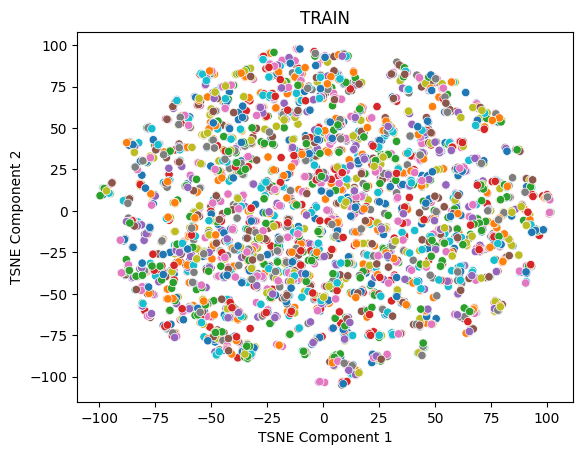

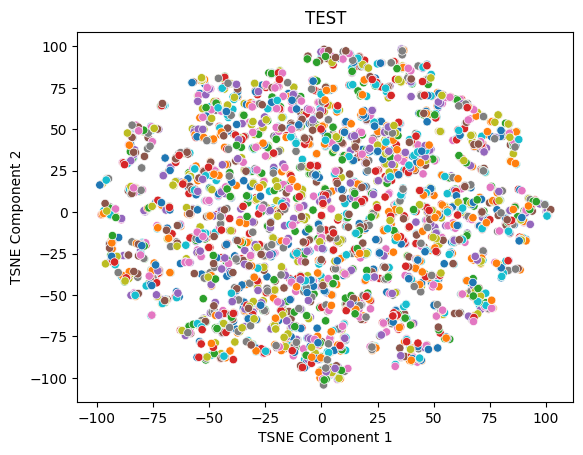

In [9]:
k = 4000
patata = Visualize(train_features = unique_images_t[:k], train_labels = labels_train[:k], test_features = unique_images_v[:k], test_labels = unique_labels_v[:k], vis_type = 'TSNE',n_comp = 2)
patata.visualization()